#Intelligent Systems - Assignment 3 

- Member Names: **Mireya Quintana and Haizea Rodriguez**
- Group ID: **C**
- Assignment: **03**
- Date: **22/04/2021**
- Time spent in the assignment: **12h**
- Proportion of effort done by members of the group: **50/50**
- Doubts and difficulties that arose during the realization:

> - We did not know that file could be a parameter we spend a lot of time trying to solve it with problem (this problem was fixed after we discuss it in class)
> - We read the theory of the LBS and tried to implement it but we were never sure if we were approaching it correctly. We tried several ideas and some of them worked but we were never sure if correctly. Because we did not know if we finnaly obtained a good algorithm we have some doubts while making the analysis. 

---

**General instructions**
 1. If you use a function of a certain library, do not forget to include in the packages vector
 2. Do not forget to comment on the code, especially those non-trivial commands (part of the rating depends on the cleaning of the code)
 3. It is strongly recommended to test any implemented function in order to    check for its proper operation

---

 **Submission**
- Print the notebook in a PDF file with all the sections expanded and all the cells executed, in a way all the code can be seen, and all the results are shown.
- Save the notebook as ipynb file.
- Submit both files, in addition to any input file needed for its execution in a zip folder into ALUD

---

**Evaluation**
- Total Evaluation - 12.5%
  - Correct and error-free execution - 7.5%
  - Documentation of analysis of results - 5%

---
**Deadline**

- April 22th

In [ ]:
# PLEASE, INCLUDE HERE IF YOU USE ANY ADDITIONAL LIBRARY
packages = c("glue","ggplot2","gridExtra","tidyverse")
newpack  = packages[!(packages %in% installed.packages()[,"Package"])]
if(length(newpack)) install.packages(newpack)
a=lapply(packages, library, character.only=TRUE)
rm(list = ls())

## Problem statement
The project is inspired by a well-known problem called the [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem).

- On the one hand, we have a **list of items with a volume and an associated value**.
- On the other hand, we have a **backpack with a maximum capacity**.

---

**Objective**

The problem consists of **putting items in the backpack in such a way that the value of the items it contains is maximised**, provided that the maximum capacity of the backpack is not exceeded.

---

**You are provided with**

You are provided with 3 files named *knapsack-XXX.txt* with:
- A first line denoting the capacity of the knapsack (*W*)
- A variable number of lines with 4 values:
  - Name of the item (*item.name*)
  - Quantity available of the item (*Qi*)
  - Value of the item (*vi*)
  - Weigth (or volume) that the item occupies in the sack (*wi*)

You are provided with formulation of the problem:
- **Complete**: where the knapsack is initialized with a random set of items inside (satisfying the constraint of capacity)

---

**You are asked to**

1. Implement the *Random Restart Hill Climbing* Method
2. Implement the *Local Beam Search* Method
3. Experiment and compare results






# FILE

In [ ]:
#@title Select the file
file <- "https://raw.githubusercontent.com/HaizeaR/Sistemas-Inteligentes-Files/main/knapsack-010.txt" #@param ["https://raw.githubusercontent.com/HaizeaR/Sistemas-Inteligentes-Files/main/knapsack-003.txt", "https://raw.githubusercontent.com/HaizeaR/Sistemas-Inteligentes-Files/main/knapsack-010.txt", "https://raw.githubusercontent.com/HaizeaR/Sistemas-Inteligentes-Files/main/knapsack-050.txt", "https://raw.githubusercontent.com/HaizeaR/Sistemas-Inteligentes-Files/main/knapsack-100.txt"]


# Provided Search methods

(you don't have to modify here, just run)

## Node expansion and results analysis

In [ ]:
expand.node = function(node, actions.possible){
  newnodes = list()
  for (i in 1:nrow(actions.possible)){
    action = actions.possible[i, ]
    state = node$state
    if (is.applicable(state,action,problem)){
      newnode = list()
      newnode$parent  = node
      newnode$parent$parent = NULL
      newnode$state   = effect(state,action)    
      newnode$actions = rbind(node$actions,action)
      newnode$depth   = node$depth+1
      newnode$cost    = node$cost+get.cost(actions.possible[i,],state)
      newnode$evaluation = get.evaluation(newnode$state,problem)
      newnodes        = append(newnodes,list(newnode))
    }
  }
  return(newnodes)
}

In [ ]:
analyze.results = function(all,problem){
  results = data.frame()
  for (i in 1:length(all)){
    name = all[[i]]$name
    print(name)
    solution.found = any(!is.na(all[[i]]$state.final))
    if (any(solution.found)){
      # Checking the solution
      solution.length = length(all[[i]]$state.final$actions)
      solution.cost   = all[[i]]$state.final$cost
      print("  Solution Found! :)",quote = F)
      actions = all[[i]]$state.final$actions
      state.current = problem$state.initial
      print("Initial State: ")
      to.string(state.current)
      for (a in 1:length(actions)){
        action = actions[a]
        state.current = effect(state.current,action)  
        print(paste0("After applying action: ",action),quote = F)
        to.string(state.current)
      }
    }else{
      solution.length = -1
      solution.cost   = -1
      print("  No Solution Found :(")
    }
    
    number.expanded = length(all[[i]]$report$iteration)
    
    maximum.depth = max(all[[i]]$report$depth.of.expanded)
    
    maximum.frontier = max(all[[i]]$report$nodes.frontier)
    
    results = rbind(results,data.frame(name=name,
                                       solution=solution.found,
                                       length=solution.length,
                                       cost=solution.cost,
                                       expanded=number.expanded,
                                       max.depth=maximum.depth,
                                       max.frontier=maximum.frontier))
    
  }
  return(results)
}

In [ ]:
plot.results = function(report,name.method,problem){
  # Generation of Graphics...
  plot1 = ggplot(report,aes(x=iteration,y=nodes.frontier))+geom_line(col="dodgerblue",size = 2)+
    labs(x="Iteration Number",
         y="Nodes stored in the frontier",
         title="Size of the Frontier",
         caption = "University of Deusto")+theme_minimal()
  
  plot2 = ggplot(report,aes(x=nodes.added.frontier))+geom_histogram(fill="dodgerblue",
                                                                    bins=length(unique(report$depth.of.expanded)),
                                                                    binwidth = 0.1)+
    labs(x="Number nodes added to frontier",
         y="Frequency",
         title="Frontier growth",
         caption = "University of Deusto")+theme_minimal()
  
  plot3 = ggplot(report,aes(x=depth.of.expanded))+geom_histogram(fill="dodgerblue",
                                                                 bins=length(unique(report$depth.of.expanded)),
                                                                 binwidth = 0.1)+
    labs(x="depth",
         y="Number of Nodes",
         title="depth of the nodes in the frontier",
         caption = "University of Deusto")+theme_minimal()
  
  grid.arrange(plot1,plot2,plot3,ncol=1,top=paste0(name.method,": ",problem$name))
}

## Hill Climber



In [ ]:
Hill.Climber = function(problem,
                        count.limit=100, 
                        count.print = 100, 
                        trace = FALSE){
  
  name.method = "Hill Climber"
  state.initial    = problem$state.initial
  state.final      = problem$state.final
  actions.possible = problem$actions.possible
  
  node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
              cost=0,
              evaluation=get.evaluation(state.initial,problem))
  frontier = list(node)
  
  count = 1
  end.reason = 0
  report = data.frame(iteration=numeric(),
                      nodes.frontier=numeric(),
                      depth.of.expanded=numeric(),
                      nodes.added.frontier=numeric())
  
  
  while (count<=count.limit){
    
    if (count%%count.print==0){
      print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
    }
    
    if (length(frontier)==0){
      end.reason = "Frontier"
      break
    }
    
    firstnode = frontier[[1]]
    
    
    frontier[[1]] = NULL
    if (trace){
      print(" ",quote = F)
      print("------------------------------", quote = F)
      print("State extracted from frontier:", quote = F)
      to.string(firstnode$state)
      print(paste0("(depth=",firstnode$depth,", cost=",firstnode$depth,", eval=",firstnode$evaluation,")"),quote = F)
    }
    
    newnodes = expand.node(firstnode, actions.possible)
    newnodes = newnodes[order(sapply(newnodes,function (x) x$evaluation))]
    
    if (length(newnodes)){
      newnode = newnodes[[1]]
      if (firstnode$evaluation > newnode$evaluation){
        frontier = c(list(newnode),frontier)
        if (trace){
          print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,", eval=",newnode$evaluation,")"),quote = F)
          to.string(newnode$state)
        }
      } else{
        end.reason = "Sollution"
        break     
      }
    }
    
    if(trace){
      print(paste0("Total states in the frontier: ", length(frontier)),quote = F)
    }
    
    report = rbind(report,
                   data.frame(iteration = count,
                              nodes.frontier = length(frontier),
                              depth.of.expanded = firstnode$depth,
                              nodes.added.frontier = 1))
    
    count = count+1
  }
  
  
  result = list()
  result$report = report
  result$name = name.method
  
  # Show the obtained (or not) final solution
  if (end.reason == "Sollution"){
    print("Best solution found!!", quote = F)
    to.string(firstnode$state)
    print("Actions: ", quote = F)
    print(firstnode$actions, quote = F)
    result$state.final = firstnode
  } else{
    if (end.reason == "Frontier"){
      print("Best solution found!!", quote = F)
      to.string(firstnode$state)
      print("Actions: ", quote = F)
      print(firstnode$actions, quote = F)
      result$state.final = firstnode
    } else{
      print("Best solution found!!", quote = F)
      to.string(firstnode$state)
      print("Actions: ", quote = F)
      print(firstnode$actions, quote = F)
      result$state.final = firstnode
    }
    result$state.final = NA
  }
  
  plot.results(report,name.method,problem)
  
  return(result)
}


## Greedy Best First Search

In [ ]:
Greedy.Best.First.Search = function(problem,
                               count.limit=100, 
                               count.print = 100, 
                               trace = FALSE){
  
  name.method = "GBFS"
  state.initial    = problem$state.initial
  state.final      = problem$state.final
  actions.possible = problem$actions.possible
  
  node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
              cost=0,
              evaluation=0)
  frontier = list(node)
  
  count = 1
  end.reason = 0
  report = data.frame(iteration=numeric(),
                      nodes.frontier=numeric(),
                      depth.of.expanded=numeric(),
                      nodes.added.frontier=numeric())
  
  
  while (count<=count.limit){
    
    if (count%%count.print==0){
      print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
    }
    
    if (length(frontier)==0){
      end.reason = "Frontier"
      break
    }
    
    firstnode = frontier[[1]]
    frontier[[1]] = NULL
    
    if (trace){
      print(" ",quote = F)
      print("------------------------------", quote = F)
      print("State extracted from frontier:", quote = F)
      to.string(firstnode$state)
      print(paste0("(depth=",firstnode$depth,", cost=",firstnode$depth,", eval=",firstnode$evaluation,")"),quote = F)
    }
    
    if (is.final.state(firstnode$state,state.final)){
      end.reason = "Sollution"
      break
    }
    
    newnodes = expand.node(firstnode, actions.possible)
    
    frontier = c(frontier,newnodes)
    nodes.added.frontier = length(newnodes)
    
    # Line added to order the frontier according with EVALUATION
    frontier = frontier[order(sapply(frontier,function (x) x$evaluation))]
    
    if(trace){
      print(paste0("Total states in the frontier: ", length(frontier)),quote = F)
    }
    
    report = rbind(report,
                   data.frame(iteration = count,
                              nodes.frontier = length(frontier),
                              depth.of.expanded = firstnode$depth,
                              nodes.added.frontier = nodes.added.frontier))
    
    count = count+1
  }
  
  
  result = list()
  result$report = report
  result$name = name.method
  
  # Show the obtained (or not) final solution
  if (end.reason == "Sollution"){
    print("Solution found!!", quote = F)
    to.string(firstnode$state)
    print("Actions: ", quote = F)
    print(firstnode$actions, quote = F)
    result$state.final = firstnode
  } else{
    if (end.reason == "Frontier"){
      print("Empty frontier. No sollution found", quote = F)
    } else{
      print("Maximum Number of iterations reached. No sollution found", quote = F)
    }
    result$state.final = NA
  }
  
  plot.results(report,name.method,problem)
  
  return(result)
}


## Breadth First Search

In [ ]:
Breadth.First.Search = function(problem,
                                count.limit = 100, 
                                count.print = 100, 
                                trace = FALSE, 
                                graph.search = FALSE){
  
  name.method = paste0("BFS", ifelse(graph.search,"+GS",""))
  state.initial    = problem$state.initial
  state.final      = problem$state.final
  actions.possible = problem$actions.possible
  
  node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
			        cost=0)
  frontier = list(node)

  if (graph.search){
    expanded = list()     
  }
  count = 1
  end.reason = 0
  report = data.frame(iteration=numeric(),
                      nodes.frontier=numeric(),
                      depth.of.expanded=numeric(),
                      nodes.added.frontier=numeric())
  
  
  while (count<=count.limit){
    if (count%%count.print==0){
      print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
    }
    
    if (length(frontier)==0){
      end.reason = "Frontier"
      break
    }
    
    firstnode = frontier[[1]]
    frontier[[1]] = NULL
    if(graph.search){
      expanded = append(expanded,list(firstnode))
    }
    
    if (trace){
      print(" ",quote = F)
      print("------------------------------", quote = F)
      print("State extracted from frontier:", quote = F)
      to.string(firstnode$state)
      print(paste0("(depth=",firstnode$depth,", cost=",firstnode$depth,")"),quote = F)
    }
    
    if (is.final.state(firstnode$state,state.final)){
      end.reason = "Sollution"
      break
    }
    
    newnodes = expand.node(firstnode, actions.possible)
    
    if (!graph.search){
		  frontier = c(frontier,newnodes)
  		nodes.added.frontier = length(newnodes)
  		if (length(newnodes)){
    		for (i in 1:length(newnodes)){
    			newnode = newnodes[[i]]		  
    			if (trace){
    			  print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,")"),quote = F)
    			  to.string(newnode$state)
    			}
    		}
  		}
    }else{
      nodes.added.frontier = 0
      if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]
          if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
            if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
        				frontier = append(frontier,list(newnode))
        				nodes.added.frontier = nodes.added.frontier + 1
                if (trace){
                  print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,")"),quote = F)
                  to.string(newnode$state)
                }
            }
          }
        }
      }
    }
    
    if(trace){
      print(paste0("Total states in the frontier: ", length(frontier)),quote = F)
    }
    
    report = rbind(report,
                   data.frame(iteration = count,
                              nodes.frontier = length(frontier),
                              depth.of.expanded = firstnode$depth,
                              nodes.added.frontier = nodes.added.frontier))
    
    count = count+1
  }
  
  
  result = list()
  result$report = report
  result$name = name.method

  # Show the obtained (or not) final solution
  if (end.reason == "Sollution"){
    print("Solution found!!", quote = F)
    to.string(firstnode$state)
    print("Actions: ", quote = F)
    print(firstnode$actions, quote = F)
    result$state.final = firstnode
  } else{
    if (end.reason == "Frontier"){
      print("Empty frontier. No sollution found", quote = F)
    } else{
      print("Maximum Number of iterations reached. No sollution found", quote = F)
    }
      result$state.final = NA
  }
  
  plot.results(report,name.method,problem)
  
  return(result)
}


## Depth First Searhc

In [ ]:
Depth.First.Search = function(problem,
                                count.limit=100, 
                                count.print = 100, 
                                trace = FALSE, 
                                graph.search = FALSE){
  
  name.method = paste0("DFS", ifelse(graph.search,"+GS",""))
  state.initial    = problem$state.initial
  state.final      = problem$state.final
  actions.possible = problem$actions.possible
  
  node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
			        cost=0)
  frontier = list(node)

  if (graph.search){
    expanded = list()     
  }
  count = 1
  end.reason = 0
  report = data.frame(iteration=numeric(),
                      nodes.frontier=numeric(),
                      depth.of.expanded=numeric(),
                      nodes.added.frontier=numeric())
  
  
  while (count<=count.limit){
    
    if (count%%count.print==0){
      print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
    }
    
    if (length(frontier)==0){
      end.reason = "Frontier"
      break
    }
    # We only change here with regards to BFS
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL
    if(graph.search){
      expanded = append(expanded,list(firstnode))
    }
    
    if (trace){
      print(" ",quote = F)
      print("------------------------------", quote = F)
      print("State extracted from frontier:", quote = F)
      to.string(firstnode$state)
      print(paste0("(depth=",firstnode$depth,", cost=",firstnode$depth,")"),quote = F)
    }
    
    if (is.final.state(firstnode$state,state.final)){
      end.reason = "Sollution"
      break
    }
    
    newnodes = expand.node(firstnode, actions.possible)
    
    if (!graph.search){
      frontier = c(frontier,newnodes)
      nodes.added.frontier = length(newnodes)
      if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]		  
          if (trace){
            print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,")"),quote = F)
            to.string(newnode$state)
          }
        }
      }
    }else{
      nodes.added.frontier = 0
      if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]
          if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
            if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
              frontier = append(frontier,list(newnode))
              nodes.added.frontier = nodes.added.frontier + 1
                if (trace){
                  print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,")"),quote = F)
                  to.string(newnode$state)
                }
            }
          }
        }
      }
    }
    
    if(trace){
      print(paste0("Total states in the frontier: ", length(frontier)),quote = F)
    }
    
    report = rbind(report,
                   data.frame(iteration = count,
                              nodes.frontier = length(frontier),
                              depth.of.expanded = firstnode$depth,
                              nodes.added.frontier = nodes.added.frontier))
    
    count = count+1
  }
  
  
  result = list()
  result$report = report
  result$name = name.method

  # Show the obtained (or not) final solution
  if (end.reason == "Sollution"){
    print("Solution found!!", quote = F)
    to.string(firstnode$state)
    print("Actions: ", quote = F)
    print(firstnode$actions, quote = F)
    result$state.final = firstnode
  } else{
    if (end.reason == "Frontier"){
      print("Empty frontier. No sollution found", quote = F)
    } else{
      print("Maximum Number of iterations reached. No sollution found", quote = F)
    }
      result$state.final = NA
  }
  
  plot.results(report,name.method,problem)
  
  return(result)
}


## Depth Limited Search

In [ ]:
Depth.Limited.Search = function(problem,
                              count.limit=100, 
                              count.print = 100, 
                              trace = FALSE, 
                              graph.search = FALSE,
                              depth.limit = 10){
  
  name.method = paste0("DLS",depth.limit, ifelse(graph.search,"+GS",""))
  state.initial    = problem$state.initial
  state.final      = problem$state.final
  actions.possible = problem$actions.possible
  
  node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
              cost=0)
  frontier = list(node)
  
  if (graph.search){
    expanded = list()     
  }
  count = 1
  end.reason = 0
  report = data.frame(iteration=numeric(),
                      nodes.frontier=numeric(),
                      depth.of.expanded=numeric(),
                      nodes.added.frontier=numeric())
  
  
  while (count<=count.limit){
    
    if (count%%count.print==0){
      print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
    }
    
    if (length(frontier)==0){
      end.reason = "Frontier"
      break
    }
    # We only change here with regards to BFS
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL
    if(graph.search){
      expanded = append(expanded,list(firstnode))
    }
    
    if (trace){
      print(" ",quote = F)
      print("------------------------------", quote = F)
      print("State extracted from frontier:", quote = F)
      to.string(firstnode$state)
      print(paste0("(depth=",firstnode$depth,", cost=",firstnode$depth,")"),quote = F)
    }
    
    if (is.final.state(firstnode$state,state.final)){
      end.reason = "Sollution"
      break
    }
    
    newnodes = expand.node(firstnode, actions.possible)
    
    if (!graph.search){
      # frontier = c(frontier,newnodes)
      nodes.added.frontier = 0
      if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]		  
          # This is the only change with regard DFS
          if (newnode$depth <= depth.limit){
            frontier = c(frontier,newnodes)
            nodes.added.frontier = nodes.added.frontier + 1
            if (trace){
              print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,")"),quote = F)
              to.string(newnode$state)
            }
          }
        }
      }
    }else{
      nodes.added.frontier = 0
      if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]
          if (newnode$depth <= depth.limit){
            if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
              if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
                frontier = append(frontier,list(newnode))
                nodes.added.frontier = nodes.added.frontier + 1
                if (trace){
                  print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,")"),quote = F)
                  to.string(newnode$state)
                }
              }
            }
          }
        }
      }
    }
    
    if(trace){
      print(paste0("Total states in the frontier: ", length(frontier)),quote = F)
    }
    
    report = rbind(report,
                   data.frame(iteration = count,
                              nodes.frontier = length(frontier),
                              depth.of.expanded = firstnode$depth,
                              nodes.added.frontier = nodes.added.frontier))
    
    count = count+1
  }
  
  
  result = list()
  result$report = report
  result$name = name.method
  
  # Show the obtained (or not) final solution
  if (end.reason == "Sollution"){
    print("Solution found!!", quote = F)
    to.string(firstnode$state)
    print("Actions: ", quote = F)
    print(firstnode$actions, quote = F)
    result$state.final = firstnode
  } else{
    if (end.reason == "Frontier"){
      print("Empty frontier. No sollution found", quote = F)
    } else{
      print("Maximum Number of iterations reached. No sollution found", quote = F)
    }
    result$state.final = NA
  }
  
  plot.results(report,name.method,problem)
  
  return(result)
}


## Iterative Deepening Search

In [ ]:
Iterative.Deepening.Search = function(problem,
                                      count.limit=100, 
                                      count.print = 100, 
                                      trace = FALSE, 
                                      graph.search = FALSE,
                                      depth.limit = 10){
  
  name.method = paste0("IDS",depth.limit, ifelse(graph.search,"+GS",""))
  state.initial    = problem$state.initial
  state.final      = problem$state.final
  actions.possible = problem$actions.possible
  
  node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
              cost=0)
  frontier = list(node)
  
  if (graph.search){
    expanded = list()     
  }
  count = 1
  end.reason = 0
  report = data.frame(iteration=numeric(),
                      nodes.frontier=numeric(),
                      depth.of.expanded=numeric(),
                      nodes.added.frontier=numeric())
  
  depth.current = 1
  while (count<=count.limit){
    
    if (count%%count.print==0){
      print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
    }
    
    if (length(frontier)==0){
      if (depth.current<depth.limit){
        depth.current = depth.current + 1
        node = list(parent=c(),
                    state=state.initial,
                    actions=c(),
                    depth=0,
                    cost=0)
        frontier = list(node)
        expanded = list() 
      }else{
        end.reason = "Frontier"
        break
      }
    }
    # We only change here with regards to BFS
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL
    if(graph.search){
      expanded = append(expanded,list(firstnode))
    }
    
    if (trace){
      print(" ",quote = F)
      print("------------------------------", quote = F)
      print("State extracted from frontier:", quote = F)
      to.string(firstnode$state)
      print(paste0("(depth=",firstnode$depth,", cost=",firstnode$depth,")"),quote = F)
    }
    
    if (is.final.state(firstnode$state,state.final)){
      end.reason = "Sollution"
      break
    }
    
    newnodes = expand.node(firstnode, actions.possible)
    
    if (!graph.search){
      nodes.added.frontier = 0
      if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]
          if (newnode$depth <= depth.current){
            frontier = append(frontier,list(newnode))
            nodes.added.frontier = nodes.added.frontier + 1
            if (trace){
              print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,")"),quote = F)
              to.string(newnode$state)
            }
          }
        }
      }
    }else{
      nodes.added.frontier = 0
      if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]
          if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
            if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
              if (newnode$depth <= depth.current){
                frontier = append(frontier,list(newnode))
                nodes.added.frontier = nodes.added.frontier + 1
                if (trace){
                  print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,")"),quote = F)
                  to.string(newnode$state)
                }
              }
            }
          }
        }
      }
    }
    
    if(trace){
      print(paste0("Total states in the frontier: ", length(frontier)),quote = F)
    }
    
    report = rbind(report,
                   data.frame(iteration = count,
                              nodes.frontier = length(frontier),
                              depth.of.expanded = firstnode$depth,
                              nodes.added.frontier = nodes.added.frontier))
    
    count = count+1
  }
  
  
  result = list()
  result$report = report
  result$name = name.method
  
  # Show the obtained (or not) final solution
  if (end.reason == "Sollution"){
    print("Solution found!!", quote = F)
    to.string(firstnode$state)
    print("Actions: ", quote = F)
    print(firstnode$actions, quote = F)
    result$state.final = firstnode
  } else{
    if (end.reason == "Frontier"){
      print("Empty frontier. No sollution found", quote = F)
    } else{
      print("Maximum Number of iterations reached. No sollution found", quote = F)
    }
    result$state.final = NA
  }
  
  plot.results(report,name.method,problem)
  
  return(result)
}


# Implemented Search Methods 🚨 

(You have to implement your methods here!)

🕵️‍♂️🕵️‍♀️🕵️‍♀️

For the implementation of the methods, you have availabe in the **Provided Search Methods** section of this Collab, the implementation of the **Hill Climber** algorithm for minimization. You can use it as base for the implementation of the required methods. 

**(Some advices, In short)**

For the implementation of **Random Restart Hill Climbing**, you can launch **repetitions** times the Hill Climber algorithm, and return the best solution found in all the executions.

For the implementation of **Local Beam Search**, you can create **beams** initial states, and put all of them in a frontier structure. Then, inside the loop, all the nodes in the frontier are extracted and expanded and, from all the generated successors, only the **beams** best ones are selected to be included in the frontier. The loop stops when no one of the generated nodes is better than their successors, and the algorithm must return the best sollution found. 

## Random Restart Hill Climbing

 ```
RANDOM RESTART HILL CLIMBING
```
---

“Random-restart hill-climbing conducts a series of hill-climbing searches from randomly generated initial states, running each until it halts or makes no discernible progress” (Russell & Norvig, 2003). 

It is not an algorithm as a whole but a little modification of the Hill Climber. One of the main purposes of this modification is to avoid local minima. Each time we eun an iteration the state initial is randomy initialized. 

For every iterations we have to select the best result and in order to do so we check on the evaluation parameter that should be the smallest one possible (more negative one)


### Pseudocode ideas

Algorithm in pseudocode from the [wikipedia](https://en.wikibooks.org/wiki/Artificial_Intelligence/Search/Iterative_Improvement/Hill_Climbing#cite_note-Russel-1)

```
function HILL-CLIMBING(problem) returns a solution state
     inputs: problem, a problem
     static: current, a node
         next, a node
     current <— MAKE-NODE(INITIAL-STATE[problem])
     loop do
         next— a highest-valued successor of current
         if VALUE[next] < VALUE[current] then return current
         current *—next
     end
```




Pseudocode presented in class

```
for (i in 1:repetitions){
  state.initial = random_state / random_sol
  f = evaluate(state.initial)

  fnew = inf # really high number
  state.current = state.initial

  while (fnew > f){
    state.new = best of successots (state.current)
    fnew = evaluate(state.new)
    if (fnew < f){
      state.current = state.new 
      f = fnew
    }
    else{
      break
    }
  }
  best.found = state.current // check whichis the best one of all 
}
return best found in all rep

```



### Algorithm

Using the class algorithm 

In [ ]:
Random.Restart.Hill.Climbing = function(file, repetitions){
  # We need to initialice and find a first random solution in order to 
  #later compare results and find the best one

  valuesRRHC = c()
  timesRRHC = c()


  problem = initialize.problem.complete(file)
  result = Hill.Climber(problem)

  for(r in 1:repetitions){
    timesRRHC[r] = system.time({
    
    problem = initialize.problem.complete(file)
    #state.initial = random.state.initial(problem)
    #state.initial = problem$state.initial
    f = get.evaluation.complete(problem$state.initial, problem)
    fnew = 1000
    
    while(fnew > f){
    
      bestResult = Hill.Climber(problem)
      fnew = get.evaluation.complete(bestResult$state.initial, problem)

      if(fnew < f){
        problem$state.initial = bestResult$state.initial
        f = fnew
      }else{
        break
      }
    }
    
   if(bestResult$state.final$evaluation < result$state.final$evaluation){
          result = bestResult
    }  
  
    valuesRRHC[r] = result$state.final$evaluation
    })
  }
  result$time = timesRRHC
  result$values = valuesRRHC
  return(result)
}

another algorithm 

In [ ]:
Random.Restart.Hill.Climbing2 = function(file, repetitions){
  valuesRRHC2 = c()
  timesRRHC2 = c()

  name.method = "Random Restart Hill Climber2"
  problem = initialize.problem(file)
  result = Hill.Climber(problem)

  counter = 1
  while(counter < repetitions){
    timesRRHC2[counter] = system.time({
    # random is not working here
    #problem$state.initial = random.state.initial(problem)
      problem = initialize.problem.complete(file)
      repetitionResult = Hill.Climber(problem)
    
      if(repetitionResult$state.final$evaluation < result$state.final$evaluation){
            result = repetitionResult
      }  
      valuesRRHC2[counter] = result$state.final$evaluation
    })
    counter = counter+1
  }
  result$time =  timesRRHC2
  result$values = valuesRRHC2
     
  return(result)
}

## Local Beam Search 


```
Local Beam Seach 
```
---
The main idea of this algortihm is to have K states initialiced randomly and exploresthe most promising one. The main benefit of this algortihm is that there is no need to compleatly explore all of them so it a memory saving algorithm. 






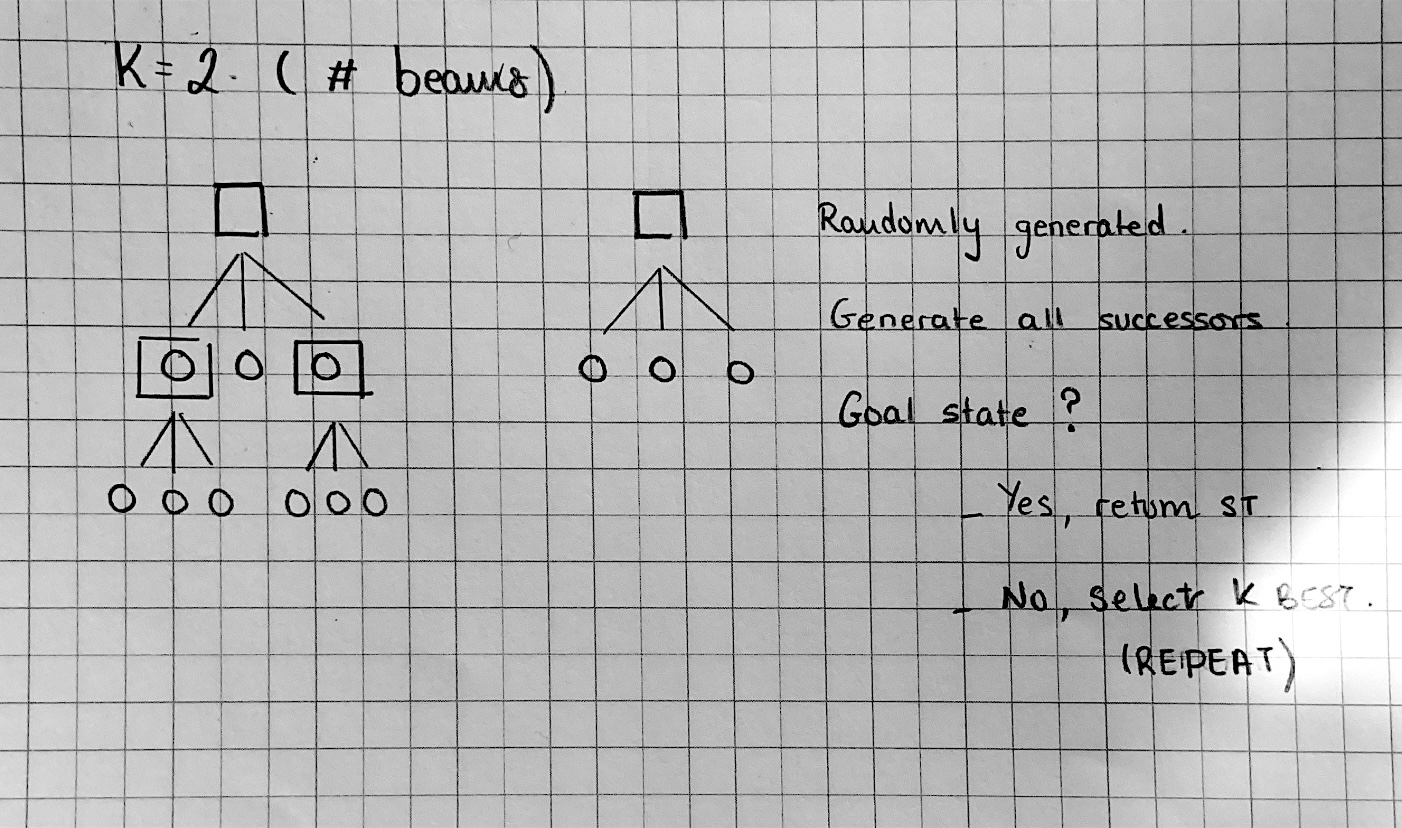

Idea of pseudocode obtained from https://www.cs.umd.edu/~nau/cmsc421/chapter04b.pdf 
```
start with k randomly generated states
loop
   generate all successors of all k states
   if any of the states = solution, then return the state
   else select the k best successors
end
```


In [ ]:
  Local.Beam.Search = function(file, beams, 
                        count.limit=1000, 
                        count.print =1000, 
                        trace = FALSE){
                        
 
  name.method = "Local.Beam.Search"
  problem = initialize.problem.complete(file)

  actions.possible = problem$actions.possible
  # complete.frontier will be the initial frontier with the beam nodes
  frontier= list()
  # Randomly generate K initial states and add them to the frontier
  i = 0 
  while (i < beams){

    problem = initialize.problem.complete(file)
    state.initial    = problem$state.initial
    state.final      = problem$state.final
    
    
    node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
              cost=0,
              evaluation=get.evaluation(state.initial,problem))
              
    frontier = c(list(node), frontier)
    i = i + 1
  }

  valuesLBS = c()
  timesLBS = c()
  # A loop for expanding each node of the frontier
    count = 1
    end.reason = 0
    report = data.frame(iteration=numeric(),
                        nodes.frontier=numeric(),
                        depth.of.expanded=numeric(),
                        nodes.added.frontier=numeric())
    while (count<=count.limit){
      timesLBS[count] = system.time({
      i = 0
      while (i < beams){
       
          
          
            if (count%%count.print==0){
                print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
              }
          
              if (length(frontier)==0){
                end.reason = "Frontier"
                break
              }

              firstnode = frontier[[1]]
              frontier[[1]] = NULL
              #Expand the node
              newnodes = expand.node(firstnode, actions.possible)
              #order results having the lowest evaluation node first
              newnodes = newnodes[order(sapply(newnodes,function (x) x$evaluation))]

              if (length(newnodes)){         
                newnode = newnodes[[1]]
                if (firstnode$evaluation > newnode$evaluation){
                  frontier = c(list(newnode), frontier)

                }else{
                    end.reason = "Sollution"
                    break     
                }
                
              }
              report = rbind(report,
                          data.frame(iteration = count,
                                      nodes.frontier = length(frontier),
                                      depth.of.expanded = firstnode$depth,
                                        nodes.added.frontier = 1))

   
      
          i = i + 1
      }
      
      valuesLBS[count] = firstnode$evaluation
    })
    count = count+1
  }

      result = list()
      result$report = report
      result$name = name.method
        # Show the obtained (or not) final solution
      if (end.reason == "Sollution"){
        print("Best solution found!!", quote = F)
        to.string(firstnode$state)
        print("Actions: ", quote = F)
        print(firstnode$actions, quote = F)
        result$state.final = firstnode
      } else{
        if (end.reason == "Frontier"){
          print("Best solution found!!", quote = F)
          to.string(firstnode$state)
          print("Actions: ", quote = F)
          print(firstnode$actions, quote = F)
          result$state.final = firstnode
        } else{
          print("Best solution found!!", quote = F)
          to.string(firstnode$state)
          print("Actions: ", quote = F)
          print(firstnode$actions, quote = F)
          result$state.final = firstnode
        }
        result$state.final = NA
      }

    result$values = valuesLBS
    result$time = timesLBS
    plot.results(report,name.method,problem)
    
  return(result)
} 

# Problem Formulation

 (you don't have to modify here, just run)

## Complete Formulation

In [ ]:
initialize.problem.complete = function(file){  
  data = read.table(file)
  W = data[1,2]
  data = data %>% 
    rename(item.name = V1,Qi = V2,vi = V3,wi = V4) %>%
    filter(item.name != "W")
  problem = list()
  init = sapply(data$Qi, function (x) sample(1:x,1))
  while (sum(init*data$wi)>W){
    i = sample(1:length(init),1)
    if(init[i]>0){
      init[i] = init[i]-1
    }
  }
  problem$state.initial = list(Q = init,
                               Qi = data$Qi-init,                               
                               W = W-sum(init*data$wi),
                               wi = data$wi)
  problem$actions.possible = rbind(data.frame(item = 1:nrow(data), howmuch = 1),
                                   data.frame(item = 1:nrow(data), howmuch = -1))
  problem$vi = data$vi
  problem$name = "test"
  return(problem)
}

In [ ]:
print(initialize.problem.complete(file))

In [ ]:
problem = initialize.problem.complete(file)
problem$state.initial$Q

In [ ]:
state = problem$state.initial
print(state)
for (i in 1:nrow(problem$actions.possible)){
  action = problem$actions.possible[i,]
  print(action)
  if (action$howmuch == 1){
    print(state$Qi[action$item]>0 & state$W>state$wi[action$item])
  }
  if (action$howmuch == -1){
    print(state$Q[action$item]>0)
  }
}

In [ ]:
is.applicable.complete = function (state,action,problem){
  if (action$howmuch == 1){
    return (state$Qi[action$item]>0 & state$W>=state$wi[action$item])
  }
  if (action$howmuch == -1){
    return (state$Q[action$item]>0)
  }
}

In [ ]:
effect.complete = function (state,action){
  result = state
  result$Q[action$item] = result$Q[action$item] + action$howmuch
  result$Qi[action$item] = result$Qi[action$item] - action$howmuch
  result$W = result$W - result$wi[action$item] * action$howmuch 
  return(result)
}

In [ ]:
print(effect.complete(problem$state.initial, problem$actions.possible[1,]))

In [ ]:
is.final.state.complete = function (state,finalstate=NULL){
  result = all(state$Qi == 0)
}

In [ ]:
to.string.complete = function (state){
  print(glue("\t[{paste0(state$Q, collapse = '-')}] - {state$W}"))
}

In [ ]:
get.cost.complete = function (action,state){
  return(1)
}

In [ ]:
get.evaluation.complete = function(state,problem){
  cost = -sum(state$Q * problem$vi)
	return(cost)
}

# Solving and comparison 🚨

(You are asked for modifications here)

For each of the problem formulation and knapsack file, you have to:
- Run the Hill Climber algorithm 10 times and calculate average and standard deviation for the obtained value and the execution time 
  - 👉 **you already have the code, and you can use as template for the rest of executions**
- Run your Random Restart Hill Climber with parameter *repetitions = 10* and calculate average and standard deviation for the obtained value and the execution time
- Run your Beam Search algorithm with parameter *beams = 3* and calculate average and standard deviation for the obtained value and the execution time
- Run your Beam Search algorithm with parameter *beams = 5* and calculate average and standard deviation for the obtained value and the execution time
- Run your Beam Search algorithm with parameter *beams = 10* and calculate average and standard deviation for the obtained value and the execution time

At the end, you have to present a table including following information:
- Problem (ks010, ks050 or ks100)
- Algorithm (HC, RRHC, BS03, BS05 or BS10)
- Average value of the knapsack obtained and its deviation
- Average execution time and its deviation

Analysis of the resuls:
- Compare the mean and deviation both in value and time
- Justify the results according with characteristics of the algorithms

## Solving Complete formulation

In [ ]:
initialize.problem = initialize.problem.complete
is.final.state = is.final.state.complete
is.applicable = is.applicable.complete
effect = effect.complete
get.cost = get.cost.complete
get.evaluation = get.evaluation.complete
to.string = to.string.complete

In [ ]:
# You can use this code structure for experimentation on different problem/methods
valuesHC = c()
timesHC = c()
for (i in 1:10){
  timesHC[i] = system.time({
    problem = initialize.problem(file)
    res = Hill.Climber(problem, trace = F)
    valuesHC[i] = res$state.final$evaluation
  })
}
print(valuesHC)
print(timesHC)


In [ ]:
resRRHC = Random.Restart.Hill.Climbing(file, 10)

In [ ]:
resRRHC2 = Random.Restart.Hill.Climbing2(file, 10)

In [ ]:
resLBS3 = Local.Beam.Search(file,3)

In [ ]:
resLBS5 = Local.Beam.Search(file,5)

In [ ]:
resLBS10 = Local.Beam.Search(file,10)

In [ ]:
# you can use this line to paste in the table
fileName = substring(file, 76, 87)

line1 = data.frame(problem = fileName,
                  algorithm = "Hill Climber",
                  value = mean(valuesHC),
                  value_sd = sd(valuesHC),
                  time = mean(timesHC),
                  time_sd = sd(timesHC))
line2 = data.frame(problem = fileName,
                  algorithm = "RR Hill.Climber",
                  value = mean(resRRHC$values),
                  value_sd = sd(resRRHC$values),
                  time = mean(resRRHC$time),
                  time_sd = sd(resRRHC$time))
                 
line3 = data.frame(problem = fileName,
                  algorithm = "RR Hill.Climber2 ",
                  value = mean(resRRHC2$values),
                  value_sd = sd(resRRHC2$values),
                  time = mean(resRRHC2$time),
                  time_sd = sd(resRRHC2$time))
                 
line4 = data.frame(problem = fileName,
                  algorithm = "Local Beam Search 3 ",
                  value = mean(resLBS3$values),
                  value_sd = sd(resLBS3$values),
                  time = mean(resLBS3$time),
                  time_sd = sd(resLBS3$time))

line5 = data.frame(problem = fileName,
                  algorithm = "Local Beam Search 5",
                  value = mean(resLBS5$values),
                  value_sd = sd(resLBS5$values),
                  time = mean(resLBS5$time),
                  time_sd = sd(resLBS5$time))
                  
line6 = data.frame(problem = fileName,
                  algorithm = "Local Beam Search 10 ",
                  value = mean(resLBS10$values),
                  value_sd = sd(resLBS10$values),
                  time = mean(resLBS10$time),
                  time_sd = sd(resLBS10$time))
print(line1)
print(line2)
print(line3)
print(line4)
print(line5)
print(line6)


## Analysis of results

Present in this section the results obtained in terms of value and time depending on the problem and formulation, as well as provide analysis.
You can include here as many cells as needed.

We are loading the files from GitHub so we cannot make all the analysis one after the other. We have to do it file by file and each time we change it the previous result are erased. Because of this we are going to include screenshots of the results. 

*(We are not sure that the implamentation of the Local Beam Search is the corret one. We have done our best trying to make sense to all the results)*



---



```
Comparison between the two options for the Random Restart Hill Climber.
```

They are quite similar but the second one tends to find better solutions. Time-wise they both need a similar amount of time. We cound say that the second one is better, however we are going to keep both for the analysis.  


```
Key theoretical difference between Random Initialiced and Local Beam Search
```
In the Random.Restart.Hill.Climber we explore each solution independently and then return the best one, however, in the Local.Beam.Search information is passed and remembered among the different beams.  



---



We think that in order to achieve better results in the analysis more executions of the algorithms are needed. The results are not exactly the same each time we run it so we believe that it will be better to repeat several times and anote the answers and with that get the results. We would need more time to do this and files like the 3rd one are really big and take a lot of time so we are not going to be able to do it.



```
Understanding the table variables
```

> - **Values** = Average value of the evaluation scores obtained for each result
> - **Standard deviation** = how much the members of a group differ from the mean value for the group. How appart are the actual values from the average
> - **Time** = time needed to execute the algorithm 




### FILE: knapsack-003

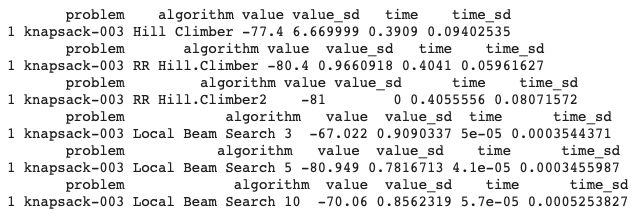

As we can see in the previous image Random Restart Hill Climber is better than the 10 times repeated Hill Climber. The idea of both of them might seem similar, but because we actually compare and store the best results on the Random Restart we are getting better results. 

- Let's rememeber that the RRHC is a modification of the HC so it makes sense that it is a better algorithm.

Local Beam search with 3 beams might be really reduced and with 5, because we are able to expand more nodes, we are getting closer to the best solution.  



### FILE: knapsack-010

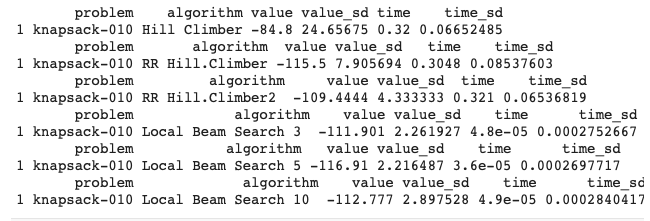

The situation with the HC and the RRHC is the same. We can get better solutions with the RRHC which makes sense becasue we are actually comparing several solutions and staying with the best ones. 

Aside from this the random inicialization helps achieving various posibilities that the HC cannot have. Let's remember that in this kind of problems more than one answer is possible but some are better than others, the random inicialization helps us having a wider range of solution from where we can get the best one. 

About the LBS similar thing happens as well, three bems are not enough with five we are obtaining better results

### FILE: knapsack-050

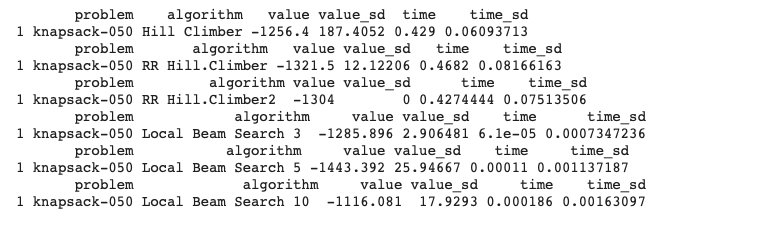

HC gives worst average results and with a huge Standard deviation which confirms once again that the RRHC is a better option for solving this kind of problems


LBS, again a similar thing happens 3 beams don't seem enought but with 5 we are getting better results, altough in this case the standard deviation is much higher than in the rest. This is something we should analyse deeper.

##NOT USED

In [ ]:
random.state.initial = function(problem){
W = problem$state.initial$W
init = sapply(problem$state.initial$Qi, function (x) sample(1:x,1))
while (sum(init*problem$state.initial$wi)>W){
  i = sample(1:length(init),1)
  if(init[i]>0){
    init[i] = init[i]-1
  }
}
state.initial = list(Q = init,
                        Qi = problem$state.initial$Qi-init,                               
                              W = W-sum(init*problem$state.initial$wi),
                              wi = problem$state.initial$wi)

#problem$state.initial = state.initial  
return(state.initial)
}                              


In [ ]:
  Local.Beam.Search = function(file, beams, 
                        count.limit=100, 
                        count.print = 100, 
                        trace = FALSE){
                        

  name.method = "Local.Beam.Search"
  
  problem = initialize.problem.complete(file)

  actions.possible = problem$actions.possible
  # complete.frontier will be the initial frontier with the beam nodes
  complete.frontier= list()
  # Randomly generate K initial states and add them to the frontier
  i = 0 
  while (i < beams){
    problem = initialize.problem.complete(file)
    state.initial    = problem$state.initial
    state.final      = problem$state.final
    
    
    node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
              cost=0,
               evaluation=get.evaluation(state.initial,problem))
              
    complete.frontier = c(list(list(node)), complete.frontier)
    i = i + 1
  }

  count2 = 1
  end.reason = 0
  report = data.frame(iteration=numeric(),
                      nodes.frontier=numeric(),
                      depth.of.expanded=numeric(),
                      nodes.added.frontier=numeric())

  while(count2<=count.limit){

    i = 0 
    new.frontier = list()
    while (i < beams){
      
      bestNode = NULL
      counter = 1
      feval = 1000
      
      for (n in complete.frontier){
        fnode = n[[1]]
       
        if (feval > fnode$evaluation){
          feval = fnode$evaluation
          bestNode = fnode
          bestNodeCounter = counter
        }
        counter = counter + 1 
      }
      new.frontier = c(new.frontier, list(list(bestNode)))
      complete.frontier[[bestNodeCounter]]  = NULL
      i = i + 1
    }
  

    complete.frontier = (new.frontier)
    
    
    # A loop for expanding each node of the frontier
    for (frontier in complete.frontier){
      
      
      count = 1
      end.reason = 0
      report = data.frame(iteration=numeric(),
                        nodes.frontier=numeric(),
                        depth.of.expanded=numeric(),
                        nodes.added.frontier=numeric())
      while (count<=count.limit){
        
        if (length(frontier)==0){
            end.reason = "Frontier"
            break
        }

        firstnode = frontier[[1]]
        frontier[[1]] = NULL
        
        newnodes = expand.node(firstnode, actions.possible)
        newnodes = newnodes[order(sapply(newnodes,function (x) x$evaluation))]

        if (length(newnodes)){
          
          newnode = newnodes[[1]]
          
          if (firstnode$evaluation > newnode$evaluation){
            
            frontier = c(list(newnode), frontier)
            
        
            
            complete.frontier = c(list(frontier), complete.frontier)
            
            if (trace){
              print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,", eval=",newnode$evaluation,")"),quote = F)
              to.string(newnode$state)
            }
          }else{
              end.reason = "Sollution"
               break     
          }

  
        }
        report = rbind(report,
                      data.frame(iteration = count,
                                  nodes.frontier = length(frontier),
                                  depth.of.expanded = firstnode$depth,
                                   nodes.added.frontier = 1))

        
        count = count + 1
      }

       
    
    }

    count2 = count2 + 1
  }
    
     
    

    result = list()
    result$report = report
    result$name = name.method
    
    # Show the obtained (or not) final solution
    if (end.reason == "Sollution"){
      print("Best solution found!!", quote = F)
      to.string(firstnode$state)
      print("Actions: ", quote = F)
      print(firstnode$actions, quote = F)
      result$state.final = firstnode
    } else{
      if (end.reason == "Frontier"){
        print("Best solution found!!", quote = F)
        to.string(firstnode$state)
        print("Actions: ", quote = F)
        print(firstnode$actions, quote = F)
        result$state.final = firstnode
      } else{
        print("Best solution found!!", quote = F)
        to.string(firstnode$state)
        print("Actions: ", quote = F)
        print(firstnode$actions, quote = F)
        result$state.final = firstnode
      }
      result$state.final = NA
    }
    
    plot.results(report,name.method,problem)
    
  return(result)
} 

In [ ]:
  Local.Beam.Search = function(file, beams, 
                        count.limit=1000, 
                        count.print =1000, 
                        trace = FALSE){
                        

  name.method = "Local.Beam.Search"
  
  problem = initialize.problem.complete(file)

  actions.possible = problem$actions.possible
  # complete.frontier will be the initial frontier with the beam nodes
  frontier= list()
  # Randomly generate K initial states and add them to the frontier
  i = 0 
  while (i < beams){
    problem = initialize.problem.complete(file)
    state.initial    = problem$state.initial
    state.final      = problem$state.final
    
    
    node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
              cost=0,
               evaluation=get.evaluation(state.initial,problem))
              
    frontier = c(list(node), frontier)
    i = i + 1
  }


    # A loop for expanding each node of the frontier
 
      count = 1
      end.reason = 0
      report = data.frame(iteration=numeric(),
                        nodes.frontier=numeric(),
                        depth.of.expanded=numeric(),
                        nodes.added.frontier=numeric())

      while (count<=count.limit){

        new.frontier = list()
        i = 0 
        while (i < beams){
          
          bestNode = NULL
          counter = 1
          feval = 1000
          
          for (n in frontier){

            if (feval > n$evaluation){
              feval = n$evaluation
              bestNode = n
              bestNodeCounter = counter
            }
            counter = counter + 1 
          }
          new.frontier = c(new.frontier, list(bestNode))
          
          frontier[[bestNodeCounter]]  = NULL
          i = i + 1
        }
        
        frontier = (new.frontier)

        if (length(frontier)==0){
            end.reason = "Frontier"
            break
        }

        firstnode = frontier[[1]]
        frontier[[1]] = NULL
        newnodes = expand.node(firstnode, actions.possible)
        newnodes = newnodes[order(sapply(newnodes,function (x) x$evaluation))]

        if (length(newnodes)){         
          newnode = newnodes[[1]]
          
          if (firstnode$evaluation > newnode$evaluation){
            
            frontier = c(list(newnode), frontier)
            
            
     
          }else{
              end.reason = "Sollution"
               break     
          }
        }
        report = rbind(report,
                    data.frame(iteration = count,
                                nodes.frontier = length(frontier),
                                depth.of.expanded = firstnode$depth,
                                  nodes.added.frontier = 1))
 
      count = count + 1
    }
    
    result = list()
    result$report = report
    result$name = name.method
    
    # Show the obtained (or not) final solution
    if (end.reason == "Sollution"){
      print("Best solution found!!", quote = F)
      to.string(firstnode$state)
      print("Actions: ", quote = F)
      print(firstnode$actions, quote = F)
      result$state.final = firstnode
    } else{
      if (end.reason == "Frontier"){
        print("Best solution found!!", quote = F)
        to.string(firstnode$state)
        print("Actions: ", quote = F)
        print(firstnode$actions, quote = F)
        result$state.final = firstnode
      } else{
        print("Best solution found!!", quote = F)
        to.string(firstnode$state)
        print("Actions: ", quote = F)
        print(firstnode$actions, quote = F)
        result$state.final = firstnode
      }
      result$state.final = NA
    }
    
    plot.results(report,name.method,problem)
    
  return(result)
} 

In [ ]:
Local.Beam.Search2 = function(file, beams, 
                        count.limit=100, 
                        count.print = 100, 
                        trace = FALSE){
  
  name.method = "Local.Beam.Search"
  poblem = initialize.problem.complete(file)
  actions.possible = problem$actions.possible
  

  # Initialice randomy Beam states
  frontier = list()
  i = 0
  while (i < beams){
    b = initialize.problem.complete(file)

    node = list(parent=c(),
            state=b$state.initial,
            actions=c(),
            depth=0,
            cost=0,
            evaluation=get.evaluation(b$state.initial,b)) 
    frontier <- c(list(node),frontier)
    
    i = i + 1
  }
  # all beams are added into the frontier 
   
  
    
    count = 1
    end.reason = 0
    report = data.frame(iteration=numeric(),
                        nodes.frontier=numeric(),
                        depth.of.expanded=numeric(),
                        nodes.added.frontier=numeric())
    while (count<=count.limit){
      
      if (count%%count.print==0){
        print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
      }
      
      if (length(frontier)==0){
        end.reason = "Frontier"
        break
      }
      
      firstnode = frontier[[1]]
      frontier[[1]] = NULL
      if (trace){
        print(" ",quote = F)
        print("------------------------------", quote = F)
        print("State extracted from frontier:", quote = F)
        to.string(firstnode$state)
        print(paste0("(depth=",firstnode$depth,", cost=",firstnode$depth,", eval=",firstnode$evaluation,")"),quote = F)
      }
      
      newnodes = expand.node(firstnode, actions.possible)
      newnodes = newnodes[order(sapply(newnodes,function (x) x$evaluation))]
      
      if (length(newnodes)){
        newnode = newnodes[[1]]
        if (firstnode$evaluation > newnode$evaluation){
          frontier = c(list(newnode),frontier)
          if (trace){
            print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,", eval=",newnode$evaluation,")"),quote = F)
            to.string(newnode$state)
          }
        } else{
          end.reason = "Sollution"
          break     
        }
      }
      
      if(trace){
        print(paste0("Total states in the frontier: ", length(frontier)),quote = F)
      }
      
      report = rbind(report,
                    data.frame(iteration = count,
                                nodes.frontier = length(frontier),
                                depth.of.expanded = firstnode$depth,
                                nodes.added.frontier = 1))
      
      count = count+1
    }
  
  
    
    result = list()
    result$report = report
    result$name = name.method
    
    # Show the obtained (or not) final solution
    if (end.reason == "Sollution"){
      print("Best solution found!!", quote = F)
      to.string(firstnode$state)
      print("Actions: ", quote = F)
      print(firstnode$actions, quote = F)
      result$state.final = firstnode
    } else{
      if (end.reason == "Frontier"){
        print("Best solution found!!", quote = F)
        to.string(firstnode$state)
        print("Actions: ", quote = F)
        print(firstnode$actions, quote = F)
        result$state.final = firstnode
      } else{
        print("Best solution found!!", quote = F)
        to.string(firstnode$state)
        print("Actions: ", quote = F)
        print(firstnode$actions, quote = F)
        result$state.final = firstnode
      }
      result$state.final = NA
    }
    
    plot.results(report,name.method,problem)
   
   
  return(result)
}


In [ ]:
Local.Beam.Search = function(file, beams, count.limit=100, 
                        count.print = 100, 
                        trace = FALSE){
  #beams will be the number of k randomly generated initial states
  
  
  name.method = "Local Beam Search"
  initial.beams = list()
  i = 0
  while (i < beams){
    b = initialize.problem.complete(file)
    initial.beams <- b

    i = i + 1
  }
  
  state.initial    = initial.beams$state.initial
    state.final      = initial.beams$state.final
    actions.possible = initial.beams$actions.possible

    node = list(parent=c(),
              state=state.initial,
              actions=c(),
              depth=0,
              cost=0,
              evaluation=get.evaluation(state.initial,problem))
    frontier = list(node)
  
    count = 1
    end.reason = 0
    report = data.frame(iteration=numeric(),
                      nodes.frontier=numeric(),
                      depth.of.expanded=numeric(),
                      nodes.added.frontier=numeric())

    while (count<=count.limit){
      
      if (count%%count.print==0){
        print(paste0("Count: ",count,", Nodes in the frontier: ",length(frontier)), quote = F)
      }
      
      if (length(frontier)==0){
        end.reason = "Frontier"
        break
      }
      
      firstnode = frontier[[1]]
      frontier[[1]] = NULL
      if (trace){
        print(" ",quote = F)
        print("------------------------------", quote = F)
        print("State extracted from frontier:", quote = F)
        to.string(firstnode$state)
        print(paste0("(depth=",firstnode$depth,", cost=",firstnode$depth,", eval=",firstnode$evaluation,")"),quote = F)
      }
      
      newnodes = expand.node(firstnode, actions.possible)
      newnodes = newnodes[order(sapply(newnodes,function (x) x$evaluation))]
      
      if (length(newnodes)){
        newnode = newnodes[[1]]
        if (firstnode$evaluation > newnode$evaluation){
          frontier = c(list(newnode),frontier)
          if (trace){
            print(paste0("State added to frontier: - (depth=",newnode$depth,", cost=",newnode$depth,", eval=",newnode$evaluation,")"),quote = F)
            to.string(newnode$state)
          }
        } else{
          end.reason = "Sollution"
          break     
        }
      }
      
      if(trace){
        print(paste0("Total states in the frontier: ", length(frontier)),quote = F)
      }
      
      report = rbind(report,
                    data.frame(iteration = count,
                                nodes.frontier = length(frontier),
                                depth.of.expanded = firstnode$depth,
                                nodes.added.frontier = 1))
      
      count = count+1
    }

  
  
  result = list()
  result$report = report
  result$name = name.method
  
  # Show the obtained (or not) final solution
  if (end.reason == "Sollution"){
    print("Best solution found!!", quote = F)
    to.string(firstnode$state)
    print("Actions: ", quote = F)
    print(firstnode$actions, quote = F)
    result$state.final = firstnode
  } else{
    if (end.reason == "Frontier"){
      print("Best solution found!!", quote = F)
      to.string(firstnode$state)
      print("Actions: ", quote = F)
      print(firstnode$actions, quote = F)
      result$state.final = firstnode
    } else{
      print("Best solution found!!", quote = F)
      to.string(firstnode$state)
      print("Actions: ", quote = F)
      print(firstnode$actions, quote = F)
      result$state.final = firstnode
    }
    result$state.final = NA
  }
  
  plot.results(report,name.method,problem)
  
  return(result)
}